In [1]:
import math
import statistics
from scipy import stats 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel("Пример для вычисления контрольных пределов по методу Ланея.xlsx")
data.head(30)

,Date,Attempts,ASR (%)
0,2020-01-01 00:00:00,653,43
1,2020-01-02 00:00:00,543,51
2,2020-01-03 00:00:00,457,47
3,2020-01-04 00:00:00,476,61
4,2020-01-05 00:00:00,522,39
5,2020-01-06 00:00:00,581,42
6,2020-01-07 00:00:00,601,59
7,2020-01-08 00:00:00,391,54
8,2020-01-09 00:00:00,456,49
9,2020-01-10 00:00:00,398,56


In [3]:
data.columns = ['Date', 'Attempts', 'ASR'] 

Если изменится колличество дне - до в следующей строке изменить 20 на новое значение.

In [4]:
df = data.iloc[:20]
df1 = data.iloc[25:]

In [6]:
np.mean(df.ASR)

49.4

In [7]:
np.mean(df.Attempts)

519.4

In [8]:
df['lagASR'] = df['ASR'].shift(1)

C:\Users\4F91~1\AppData\Local\Temp/ipykernel_4004/1173406184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lagASR'] = df['ASR'].shift(1)


In [9]:
df['A']= abs(df['ASR']-df['lagASR'])

C:\Users\4F91~1\AppData\Local\Temp/ipykernel_4004/3765049214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['A']= abs(df['ASR']-df['lagASR'])


In [11]:
np.mean(df.A)

9.526315789473685

Вычисляем границы 3 сигма

In [12]:
df['UCL']=np.mean(df.ASR)+2.66*np.mean(df.A)*(np.mean(df.Attempts)/df['Attempts'])**(0.5)
df['LCL']=np.mean(df.ASR)-2.66*np.mean(df.A)*(np.mean(df.Attempts)/df['Attempts'])**(0.5)


C:\Users\4F91~1\AppData\Local\Temp/ipykernel_4004/3935116781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UCL']=np.mean(df.ASR)+2.66*np.mean(df.A)*(np.mean(df.Attempts)/df['Attempts'])**(0.5)
C:\Users\4F91~1\AppData\Local\Temp/ipykernel_4004/3935116781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LCL']=np.mean(df.ASR)-2.66*np.mean(df.A)*(np.mean(df.Attempts)/df['Attempts'])**(0.5)


In [13]:
df

,Date,Attempts,ASR,lagASR,A,UCL,LCL
0,2020-01-01 00:00:00,653,43,NaN,NaN,71.999612,26.800388
1,2020-01-02 00:00:00,543,51,43,8,74.183216,24.616784
2,2020-01-03 00:00:00,457,47,51,4,76.414659,22.385341
3,2020-01-04 00:00:00,476,61,47,14,75.87001,22.92999
4,2020-01-05 00:00:00,522,39,61,22,74.676814,24.123186
5,2020-01-06 00:00:00,581,42,39,3,73.359046,25.440954
6,2020-01-07 00:00:00,601,59,42,17,72.95702,25.84298
7,2020-01-08 00:00:00,391,54,59,5,78.605807,20.194193
8,2020-01-09 00:00:00,456,49,54,5,76.444264,22.355736
9,2020-01-10 00:00:00,398,56,49,7,78.347832,20.452168


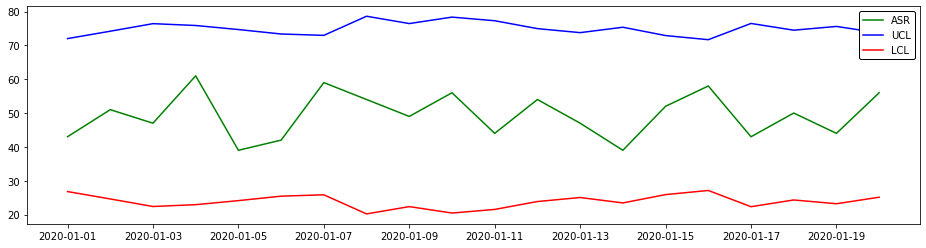

In [14]:
x = df.Date
ASR = df.ASR
UCL = df.UCL
LCL = df.LCL
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot()
ax.plot(x, ASR, color= 'g', label='ASR')
ax.plot(x, UCL, color= 'b', label='UCL')
ax.plot(x, LCL, color= 'r', label='LCL')
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")

plt.show()

In [15]:
df1['UCL'] = np.mean(df.ASR) + 2.66*np.mean(df.A)*(np.mean(df.Attempts)/data.Attempts.iloc[25:])**(0.5)

C:\Users\4F91~1\AppData\Local\Temp/ipykernel_4004/3863577839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['UCL'] = np.mean(df.ASR) + 2.66*np.mean(df.A)*(np.mean(df.Attempts)/data.Attempts.iloc[25:])**(0.5)


In [16]:
df1['LCL'] = np.mean(df.ASR) - 2.66*np.mean(df.A)*(np.mean(df.Attempts)/data.Attempts.iloc[25:])**(0.5)

C:\Users\4F91~1\AppData\Local\Temp/ipykernel_4004/3923162012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LCL'] = np.mean(df.ASR) - 2.66*np.mean(df.A)*(np.mean(df.Attempts)/data.Attempts.iloc[25:])**(0.5)


In [17]:
df1

,Date,Attempts,ASR,UCL,LCL
25,2020-01-21 00:00:00,678,24,71.57904,27.22096


In [ ]:
Значение ASR выходит за границы диапазона 3 сигма.